In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import random


In [2]:
df1 = pd.read_csv('census-income.data.csv')
df2 = pd.read_csv('census-income.test.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_countr   32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
def determine_type_of_feature(df):
    feature_types = []
    n_unique_values_threshold = 15

    for column in df.columns:
        unique_values = df[column].unique()
        example_value = unique_values[0]

        if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_threshold):
            feature_types.append("Discrete")
        else:
            feature_types.append("Continuous")
    
    return feature_types

In [5]:
global FEATURE_TYPES
FEATURE_TYPES = determine_type_of_feature(df1)

In [6]:
def missing_values(df):
    c=0
    for i in df.columns:
        x,count_missing = np.unique(df[i].eq('?'),return_counts=True)
        if len(x)==2:
            print(i,"-",FEATURE_TYPES[c],"-",count_missing[1])
        # elif len(x)==1 and x[0] == False:
        #     print(i,"-",FEATURE_TYPES[c],"- 0",)
        c+=1

In [7]:
def fill_values(df):
    #Since all columns are having the discrete value. We replace it with the missing values with the modes, i.e. the highest appearing value
    mode_workclass = df.workclass.mode()[0]
    mode_occupation = df.occupation.mode()[0]
    mode_native_countr = df.native_countr.mode()[0]

    #Filling the train and test data with the modes of missing values as they are discrete
    df.workclass = df.workclass.replace('?', mode_workclass)
    df.occupation = df.occupation.replace('?', mode_occupation)
    df.native_countr = df.native_countr.replace('?', mode_native_countr)
    missing_values(df)#No missing values
    return df

In [8]:
df2['label'] = df2['label'].str.replace('.', '')
missing_values(df1)
missing_values(df2)
fill_values(df1)
fill_values(df2)

workclass - Discrete - 1836
occupation - Discrete - 1843
native_countr - Discrete - 583
workclass - Discrete - 963
occupation - Discrete - 966
native_countr - Discrete - 274


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_countr,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
def train_test_split(df,test_size):
    #checks whether the test_size is a proportion of the total number of samples
    if isinstance(test_size,float): 
        test_size = round(test_size*len(df))

    #store random samples in the test and training data
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k = test_size)

    #random data points from sample sent to test and training data
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df , test_df

In [10]:
df_combined = pd.concat([df1,df2],ignore_index=True)

In [11]:
workclass_dict = {
    'Federal-gov': 1,
    'Local-gov': 2,
    'Never-worked': 3,
    'Private': 4,
    'Self-emp-inc': 5,
    'Self-emp-not-inc': 6,
    'State-gov': 7,
    'Without-pay': 8
}

education_dict = {
    '10th': 1,
    '11th': 2,
    '12th': 3,
    '1st-4th': 4,
    '5th-6th': 5,
    '7th-8th': 6,
    '9th': 7,
    'Assoc-acdm': 8,
    'Assoc-voc': 9,
    'Bachelors': 10,
    'Doctorate': 11,
    'HS-grad': 12,
    'Masters': 13,
    'Preschool': 14,
    'Prof-school': 15,
    'Some-college': 16
}

marital_status_dict = {
    'Divorced': 1,
    'Married-AF-spouse': 2,
    'Married-civ-spouse': 3,
    'Married-spouse-absent': 4,
    'Never-married': 5,
    'Separated': 6,
    'Widowed': 7
}

occupation_dict = {
    'Adm-clerical': 1,
    'Armed-Forces': 2,
    'Craft-repair': 3,
    'Exec-managerial': 4,
    'Farming-fishing': 5,
    'Handlers-cleaners': 6,
    'Machine-op-inspct': 7,
    'Other-service': 8,
    'Priv-house-serv': 9,
    'Prof-specialty': 10,
    'Protective-serv': 11,
    'Sales': 12,
    'Tech-support': 13,
    'Transport-moving': 14
}

relationship_dict = {
    'Husband': 1,
    'Not-in-family': 2,
    'Other-relative': 3,
    'Own-child': 4,
    'Unmarried': 5,
    'Wife': 6
}

race_dict = {
    'Amer-Indian-Eskimo': 1,
    'Asian-Pac-Islander': 2,
    'Black': 3,
    'Other': 4,
    'White': 5
}

sex_dict = {
    'Female': 1,
    'Male': 2
}

native_countr_dict = {
    'Cambodia': 1,
    'Canada': 2,
    'China': 3,
    'Columbia': 4,
    'Cuba': 5,
    'Dominican-Republic': 6,
    'Ecuador': 7,
    'El-Salvador': 8,
    'England': 9,
    'France': 10,
    'Germany': 11,
    'Greece': 12,
    'Guatemala': 13,
    'Haiti': 14,
    'Holand-Netherlands': 15,
    'Honduras': 16,
    'Hong': 17,
    'Hungary': 18,
    'India': 19,
    'Iran': 20,
    'Ireland': 21,
    'Italy': 22,
    'Jamaica': 23,
    'Japan': 24,
    'Laos': 25,
    'Mexico': 26,
    'Nicaragua': 27,
    'Outlying-US(Guam-USVI-etc)': 28,
    'Peru': 29,
    'Philippines': 30,
    'Poland': 31,
    'Portugal': 32,
    'Puerto-Rico': 33,
    'Scotland': 34,
    'South': 35,
    'Taiwan': 36,
    'Thailand': 37,
    'Trinadad&Tobago': 38,
    'United-States': 39,
    'Vietnam': 40,
    'Yugoslavia': 41
}

label_dict = {
    '<=50K': 0,
    '>50K': 1
}

In [12]:
df_combined.workclass = df_combined.workclass.map(workclass_dict)

df_combined.education = df_combined.education.map(education_dict)

df_combined.marital_status = df_combined.marital_status.map(marital_status_dict)

df_combined.occupation = df_combined.occupation.map(occupation_dict)

df_combined.relationship = df_combined.relationship.map(relationship_dict)

df_combined.race = df_combined.race.map(race_dict)

df_combined.sex = df_combined.sex.map(sex_dict)

df_combined.native_countr = df_combined.native_countr.map(native_countr_dict)

df_combined.label = df_combined.label.map(label_dict)

In [13]:
df_combined.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_countr,label
0,39,7,77516,10,13,5,1,2,5,2,2174,0,40,39,0
1,50,6,83311,10,13,3,4,1,5,2,0,0,13,39,0
2,38,4,215646,12,9,1,6,2,5,2,0,0,40,39,0
3,53,4,234721,2,7,3,6,1,3,2,0,0,40,39,0
4,28,4,338409,10,13,3,10,6,3,1,0,0,40,5,0


In [14]:
df_train , df_test = train_test_split(df_combined , 0.33)


In [15]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_countr,label
33507,54,4,279337,6,4,3,3,1,5,2,0,0,40,39,0
19430,19,4,445728,12,9,5,3,2,5,2,0,0,40,39,0
35009,45,6,305474,1,6,3,3,1,3,2,0,0,40,14,0
40491,46,6,265097,12,9,3,3,1,5,2,0,0,40,11,0
23108,30,2,102130,16,10,3,3,1,5,2,0,0,40,39,0


In [16]:
y_test = df_test.label.values

df_test = df_test.drop('label',axis = 1)

x_test = df_test.values


In [17]:
y_train = df_train.label.values

df_train = df_train.drop('label',axis =1)

x_train = df_train.values



In [18]:
x_train = x_train.T
x_test = x_test.T

In [19]:
y_test.shape[0]

16118

In [20]:
def normalize_data(data):
    max_row = np.amax(data,axis=1)
    min_row = np.amin(data,axis=1)
    diff = max_row-min_row
    diff = diff.reshape(diff.shape[0],1)
    max_row = max_row.reshape(max_row.shape[0],1)
    min_row = min_row.reshape(min_row.shape[0],1)
    diff = diff.reshape(diff.shape[0],1)
    data = np.divide((data-min_row),diff)

    return(data)

In [21]:
x_test = normalize_data(x_test)
x_train = normalize_data(x_train)

In [22]:
x_test

array([[0.50684932, 0.02739726, 0.38356164, ..., 0.45205479, 0.24657534,
        0.09589041],
       [0.42857143, 0.42857143, 0.71428571, ..., 0.85714286, 0.42857143,
        0.42857143],
       [0.22287412, 0.36173938, 0.24468732, ..., 0.07135006, 0.2638758 ,
        0.1661299 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39795918, 0.39795918, 0.39795918, ..., 0.39795918, 0.39795918,
        0.39795918],
       [0.95      , 0.95      , 0.325     , ..., 0.95      , 0.625     ,
        0.625     ]])

In [23]:
x_train

array([[0.30136986, 0.45205479, 0.49315068, ..., 0.30136986, 0.64383562,
        0.36986301],
       [0.85714286, 0.71428571, 0.42857143, ..., 0.42857143, 0.42857143,
        0.42857143],
       [0.04317057, 0.04709504, 0.14963251, ..., 0.13656086, 0.20833505,
        0.04748783],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39795918, 0.12244898, 0.39795918, ..., 0.35714286, 0.39795918,
        0.39795918],
       [0.95      , 0.95      , 0.95      , ..., 0.95      , 0.95      ,
        0.95      ]])

In [24]:
m_train = x_train.shape[1]
m_test = x_test.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 32724
Number of testing examples: m_test = 16118
train_set_x shape: (14, 32724)
train_set_y shape: (32724,)
test_set_x shape: (14, 16118)
test_set_y shape: (16118,)


In [25]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return(s)

In [26]:
def initialize_with_zeros(dim):
    w = np.random.randn(dim,1)
    b = float(0)
    return w,b

In [27]:
def propogate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1/m) * np.sum(A-Y)

    cost = np.squeeze(np.array(cost))

    grads = {'dw':dw, 'db':db}

    return grads , cost

In [28]:
def optimize(w, b, X, Y, num_iterations=100, learn_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):

        grads , cost = propogate(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        w = w - learn_rate * dw
        b = b - learn_rate * db

        if i%100 == 0:
            costs.append(cost)

            if print_cost:
                print("Cost after iteration %i: %f"%(i, cost))

    params = {'w' : w, 'b' : b}
    grads = {'dw' : dw, 'db' : db}

    return params, grads , costs


In [29]:
# params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

In [30]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    # print(w.shape)

    A  = sigmoid(np.dot(w.T,X) + b)

    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [31]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w , b = initialize_with_zeros(X_train.shape[0])

    params , grads , costs = optimize(w , b, X_train , Y_train, num_iterations, learning_rate, print_cost = print_cost)

    w = params['w']
    b = params['b']

    Y_prediction_train = predict(w , b, X_train )
    Y_prediction_test = predict(w , b, X_test )

    if print_cost:
        print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

    return d

In [32]:
logistic_regression_model = model(x_train,y_train,x_test,y_test,num_iterations=2000, learning_rate=1, print_cost=True)


Cost after iteration 0: 0.643889
Cost after iteration 100: 0.463570
Cost after iteration 200: 0.441877
Cost after iteration 300: 0.430041
Cost after iteration 400: 0.422758
Cost after iteration 500: 0.417841
Cost after iteration 600: 0.414276
Cost after iteration 700: 0.411554
Cost after iteration 800: 0.409397
Cost after iteration 900: 0.407638
Cost after iteration 1000: 0.406174
Cost after iteration 1100: 0.404934
Cost after iteration 1200: 0.403870
Cost after iteration 1300: 0.402944
Cost after iteration 1400: 0.402132
Cost after iteration 1500: 0.401411
Cost after iteration 1600: 0.400767
Cost after iteration 1700: 0.400186
Cost after iteration 1800: 0.399657
Cost after iteration 1900: 0.399174
Train accuracy: 81.68928003911502 %
Test accuracy: 81.26938826157092 %


In [33]:
logistic_regression_model['b']

-5.646288420664727

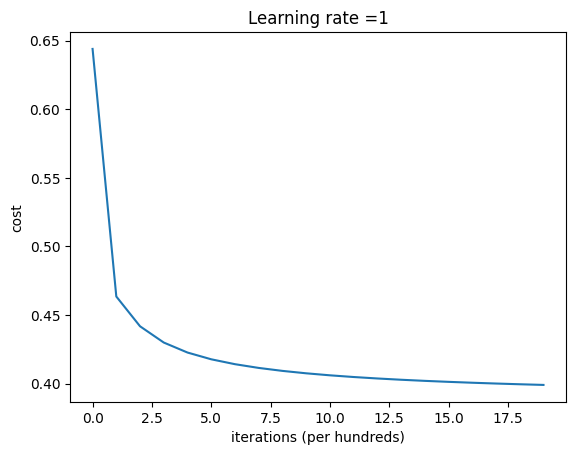

In [34]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 5

-------------------------------------------------------

Training a model with learning rate: 1

-------------------------------------------------------

Training a model with learning rate: 0.9

-------------------------------------------------------

Training a model with learning rate: 0.5

-------------------------------------------------------

Training a model with learning rate: 0.1

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



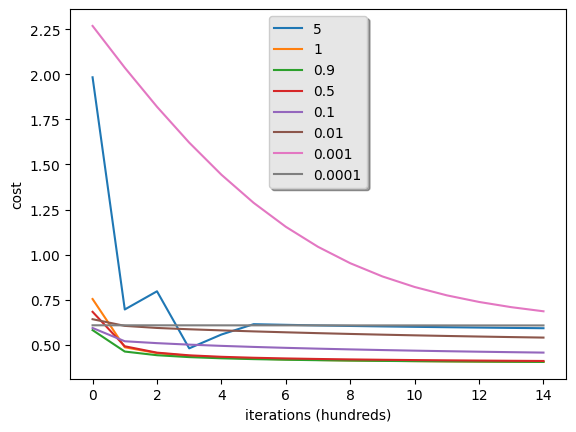

In [35]:
learning_rates = [5,1,0.9,0.5,0.1,0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(x_train, y_train, x_test, y_test, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [36]:
predict_test = []
predict_train = []

for key , value in models.items(): 
    predict_train.append(100 - np.mean(np.abs(value['Y_prediction_train'] - y_train)) * 100)
    predict_test.append(100 - np.mean(np.abs(value['Y_prediction_test'] - y_test)) * 100)

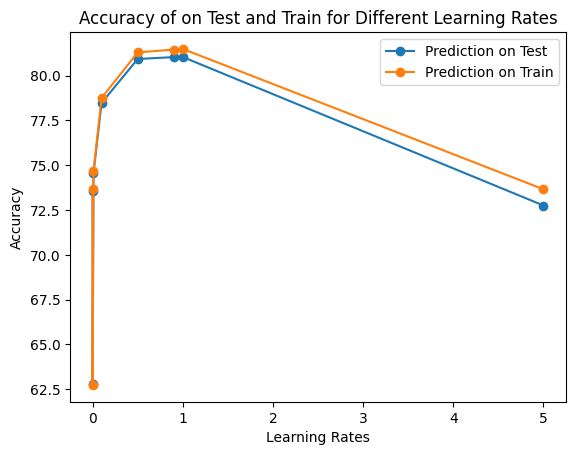

In [37]:
plt.plot(learning_rates,predict_test,label = "Prediction on Test",marker = "o")
plt.plot(learning_rates,predict_train,label = "Prediction on Train",marker = "o")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy of on Test and Train for Different Learning Rates")
plt.show()
